<a href="https://colab.research.google.com/github/wikibook/machine-learning/blob/2.0/jupyter_notebook/6.3_오토인코더.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  %tensorflow_version 2.x
except Exception:
  pass

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from IPython.display import Image

# 항상 같은 결과를 갖기 위해 랜덤 시드 설정
tf.random.set_seed(1)
np.random.seed(1)

# 오토인코더란?
입력값을 압축시킨 후, 압축된 정보를 다시 복원하여 값을 출력하는 비지도 학습 딥러닝 모델입니다. 오토인코더는 학습 과정을 통해 출력값이 최대한 입력값과 일치하도록 파라미터가 최적화됩니다. 오토인코더의 압축된 정보는 입력값에서 노이즈가 제거된 핵심 특징들로 구성된 저차원 데이터로 간주되어, 주로 차원 축소의 목적으로 오토인코더가 많이 사용됩니다.

In [3]:
Image(url= "https://raw.githubusercontent.com/captainchargers/deeplearning/master/img/autoencoder1.png", width=500, height=250)

# 오토인코더 실습 
이번 실습을 통해 MNIST 손글씨를 오토인코더를 활용하여 차원축소해보겠습니다.

# MNIST 데이터 획득
MNIST 데이터는 아래의 코드를 실행하여 획득하실 수 있습니다.

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# MNIST 데이터 전처리
획득된 학습데이터는 오토인코더에 사용합니다. 테스트 데이터 중 300개의 데이터만 선택하여 데이터 시각화에 사용하도록 하겠습니다.

In [5]:
# we will use train data for auto encoder training
x_train = x_train.reshape(60000, 784)

# select only 300 test data for visualization
x_test = x_test[:300]
y_test = y_test[:300]
x_test = x_test.reshape(300, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize data
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

# 오토인코더 다이어그램
텐서플로우로 구현할 오토인코더는 아래 그림과 같습니다.

In [6]:
Image(url= "https://raw.githubusercontent.com/captainchargers/deeplearning/master/img/autoencoder2.png", width=500, height=250)

# 텐서플로우 모델 만들기
아래의 코드를 실행하여 텐서플로우 모델을 만듭니다. 손실함수는 입력값과 출력값의 차이를 최소화하는 것으로 설정된 것을 확인할 수 있습니다.

In [7]:
# this is the size of our encoded representations
encoding_dim = 3

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [8]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [9]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [10]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [11]:
autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 300 samples
Epoch 1/30
60000/60000 [==============================] - 9s 148us/sample - loss: 0.3211 - val_loss: 0.2502
Epoch 2/30
60000/60000 [==============================] - 7s 114us/sample - loss: 0.2446 - val_loss: 0.2299
Epoch 3/30
60000/60000 [==============================] - 7s 118us/sample - loss: 0.2322 - val_loss: 0.2221
Epoch 4/30
60000/60000 [==============================] - 8s 126us/sample - loss: 0.2277 - val_loss: 0.2181
Epoch 5/30
60000/60000 [==============================] - 9s 153us/sample - loss: 0.2253 - val_loss: 0.2153
Epoch 6/30
60000/60000 [==============================] - 9s 144us/sample - loss: 0.2235 - val_loss: 0.2140
Epoch 7/30
60000/60000 [==============================] - 9s 150us/sample - loss: 0.2223 - val_loss: 0.2123
Epoch 8/30
60000/60000 [==============================] - 9s 150us/sample - loss: 0.2212 - val_loss: 0.2113
Epoch 9/30
60000/60000 [==============================] - 9s 152us/sample - loss: 0.2204

In [12]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [13]:
encoded_imgs[0]

array([12.051914 , 12.509476 ,  2.6665034], dtype=float32)

In [14]:
xs = encoded_imgs[:, 0]

In [15]:
y_test

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4,
       8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6,
       5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5,
       1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7,
       1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6,
       4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5,
       7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9,
       8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7,
       9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2,
       6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8], d

# 데이터 시각화
압축된 데이터를 사용하여 3d 챠트에 시각화하도록 하겠습니다.

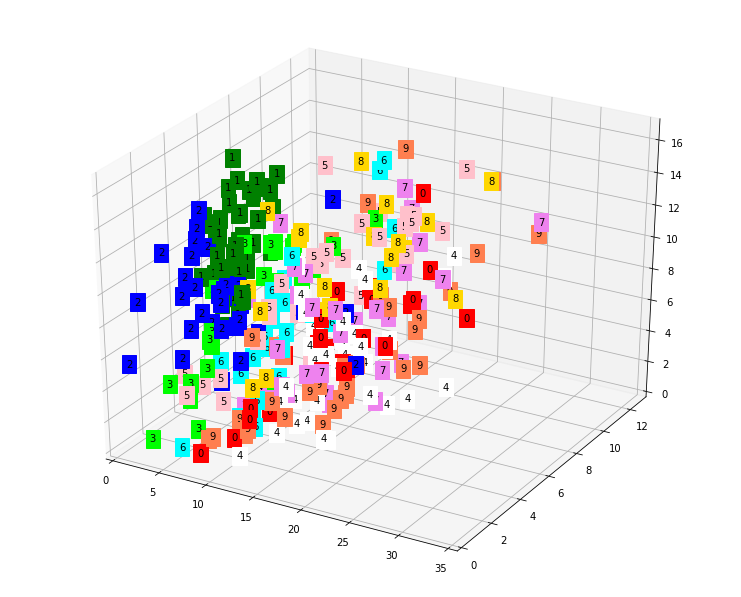

In [16]:
# visualize in 3D plot
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

fig = plt.figure(1)
ax = Axes3D(fig)

xs = encoded_imgs[:, 0]
ys = encoded_imgs[:, 1]
zs = encoded_imgs[:, 2]

color=['red','green','blue','lime','white','pink','aqua','violet','gold','coral']

for x, y, z, label in zip(xs, ys, zs, y_test):
    c = color[int(label)]
    ax.text(x, y, z, label, backgroundcolor=c)
    
ax.set_xlim(xs.min(), xs.max())
ax.set_ylim(ys.min(), ys.max())
ax.set_zlim(zs.min(), zs.max())

plt.show()

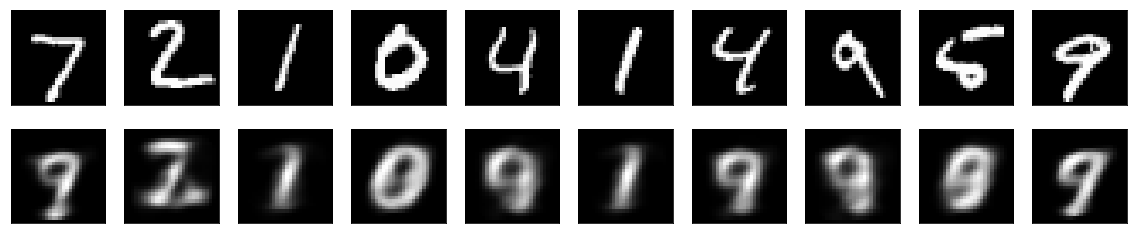

In [17]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()